## Maps

In [1]:
import pandas as pd
import geopandas
import os

In [2]:
import stroke_maps.plot as maps
from stroke_maps.utils import convert_df_to_gdf

In [3]:
dir_maps = os.path.join('output', 'steven_seagull', 'combined', 'maps')

In [4]:
# Load in the data

gdf_boundaries_regions = pd.read_csv(
    os.path.join(dir_maps, 'gdf_boundaries_regions.csv'),
    index_col=[0],
    header=[0, 1],
)
gdf_points_units = pd.read_csv(
    os.path.join(dir_maps, 'gdf_points_units.csv'),
    index_col=[0],
    header=[0, 1, 2],
)
gdf_lines_transfer = pd.read_csv(
    os.path.join(dir_maps, 'gdf_lines_transfer.csv'),
    index_col=[0],
    header=[0, 1],
)
gdf_boundaries_lsoa = pd.read_csv(
    os.path.join(dir_maps, 'gdf_boundaries_lsoa.csv'),
    index_col=[0],
    header=[0, 1, 2],
)
gdf_boundaries_catchment = pd.read_csv(
    os.path.join(dir_maps, 'gdf_boundaries_catchment.csv'),
    index_col=[0],
    header=[0, 1],
)

In [5]:
gdf_boundaries_regions = convert_df_to_gdf(gdf_boundaries_regions)
gdf_points_units = convert_df_to_gdf(gdf_points_units)
gdf_lines_transfer = convert_df_to_gdf(gdf_lines_transfer)
gdf_boundaries_lsoa = convert_df_to_gdf(gdf_boundaries_lsoa)
gdf_boundaries_catchment = convert_df_to_gdf(gdf_boundaries_catchment)

In [6]:
(
gdf_boundaries_regions,
gdf_points_units,
gdf_boundaries_catchment,
gdf_boundaries_lsoa,
gdf_lines_transfer,
box_shared,
map_extent_shared
        ) = maps.main(
    gdf_boundaries_regions,
    gdf_points_units,
    gdf_boundaries_catchment,
    gdf_boundaries_lsoa,
    gdf_lines_transfer,
    crop_axis_leeway=5000
    )

/home/anna/miniconda3/envs/simpy/lib/python3.10/site-packages/shapely/predicates.py:778: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)
/home/anna/miniconda3/envs/simpy/lib/python3.10/site-packages/geopandas/geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
/home/anna/miniconda3/envs/simpy/lib/python3.10/site-packages/geopandas/geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setit

## Plotting

In [12]:
scenario = 'mothership'

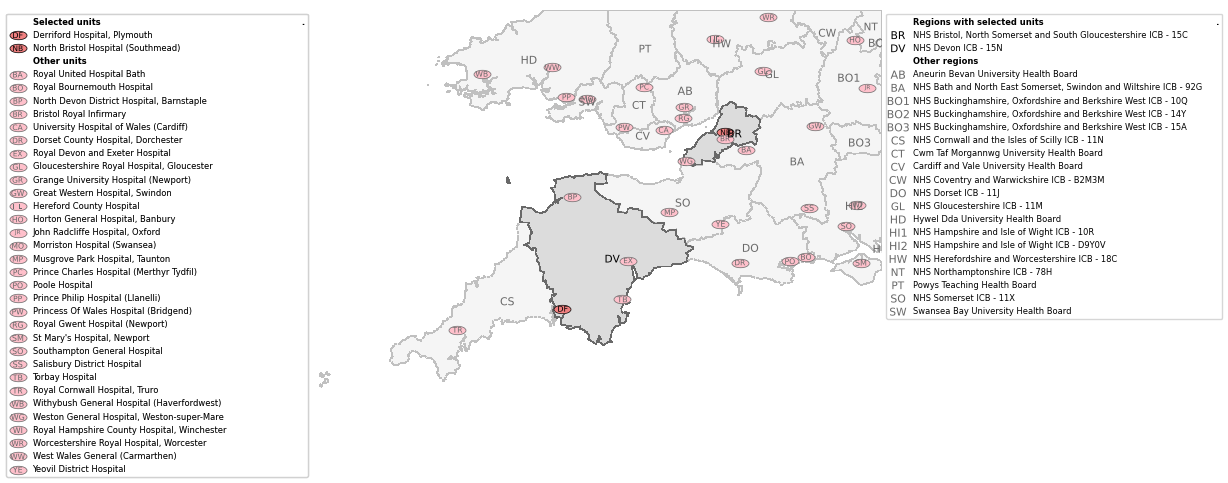

In [13]:
maps.plot_map_selected_regions(
    gdf_boundaries_regions,
    gdf_points_units,
    scenario=scenario,
    map_extent=map_extent_shared,
    path_to_file=os.path.join(dir_maps, f'map_regions_{scenario}.png')
)

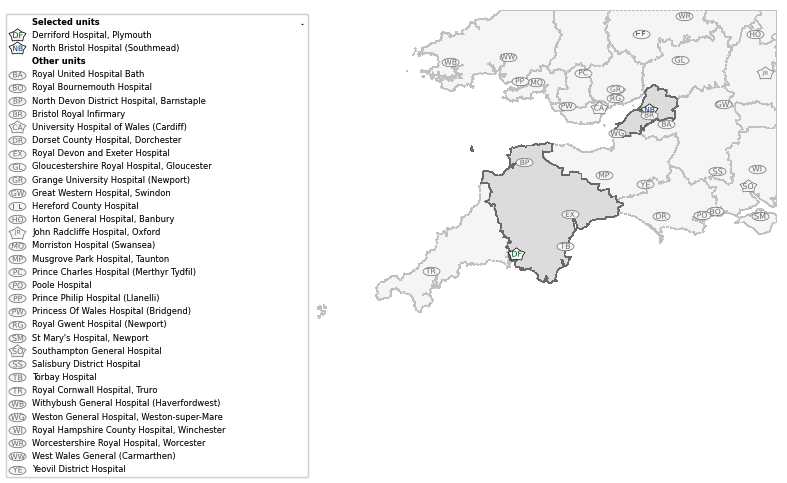

In [14]:
maps.plot_map_selected_units(
    gdf_boundaries_regions,
    gdf_points_units,
    gdf_lines_transfer,
    scenario=scenario,
    map_extent=map_extent_shared,
    path_to_file=os.path.join(dir_maps, f'map_units_{scenario}.png')
)

/home/anna/miniconda3/envs/simpy/lib/python3.10/site-packages/stroke_maps/plot_functions.py:278: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  gdf.plot(


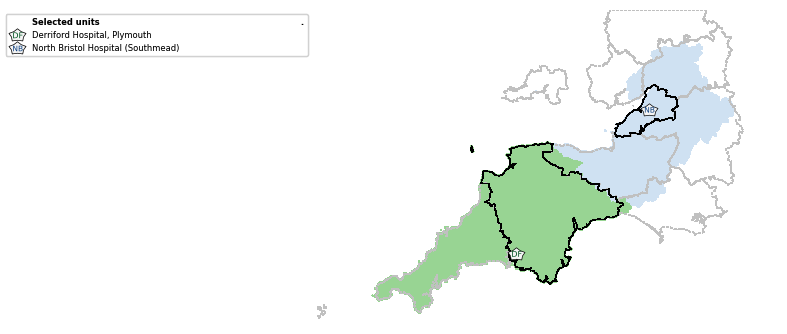

In [15]:
maps.plot_map_catchment(
    gdf_boundaries_catchment,
    gdf_boundaries_regions,
    gdf_points_units,
    gdf_lines_transfer,
    scenario=scenario,
    map_extent=map_extent_shared,
    path_to_file=os.path.join(dir_maps, f'map_catchment_{scenario}.png')
)

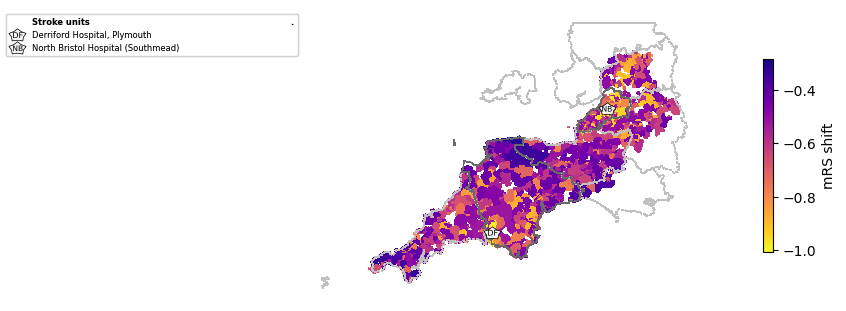

In [16]:
outcome = 'mRS shift'
# scenario='diff_drip-and-ship_minus_mothership'

maps.plot_map_outcome(
    gdf_boundaries_lsoa,
    gdf_boundaries_regions,
    gdf_points_units,
    scenario=scenario,
    outcome=outcome,
    path_to_file=os.path.join(dir_maps, f'map_{outcome}_{scenario}.png')
)